# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [4]:
data = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')

    

In [5]:
data.shape, data_test.shape

((5282, 20), (1761, 19))

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
#посмотрим на случайные 5 строчек
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3633,12,56.65,654.85,Male,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,1
4132,71,105.55,7405.5,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Electronic check,0
4827,61,51.35,3244.4,Female,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
4516,2,80.20,181.1,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
1000,46,110.00,4874.8,Female,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1


In [8]:
# смотрим есть ли в датасете nan'ы => их нет 
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
#из сводки по таблицы мы видим, что TotalSpend принимает не числовое значение => необходимо его обработать 
# в TotalSpent есть пропущенные значение (пустые строки)

total_spend = data['TotalSpent'][data['TotalSpent'] != ' '].astype(float)
median_value = total_spend.mean()

data['TotalSpent'] = data['TotalSpent'].replace(' ', median_value).astype(float)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [12]:
# проделываем то же самое на тестовых данных

data_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [14]:
#из сводки по таблицы мы видим, что TotalSpend принимает не числовое значение => необходимо его обработать 
# в TotalSpent есть пропущенные значение (пустые строки)

total_spend = data_test['TotalSpent'][data_test['TotalSpent'] != ' '].astype(float)
median_value = total_spend.mean()

data_test['TotalSpent'] = data_test['TotalSpent'].replace(' ', median_value).astype(float)


In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

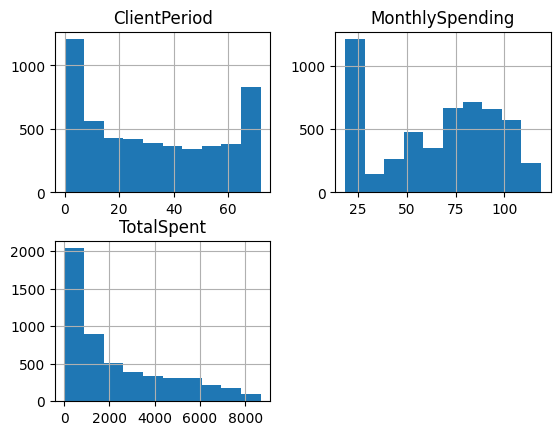

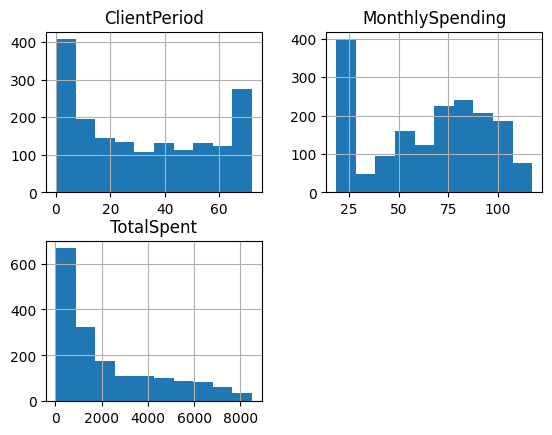

In [16]:
data[num_cols].hist()
data_test[num_cols].hist()
plt.show()

In [47]:
# Данные распределены на достаточно разных промежуточных значениях. Данные надо нормировать

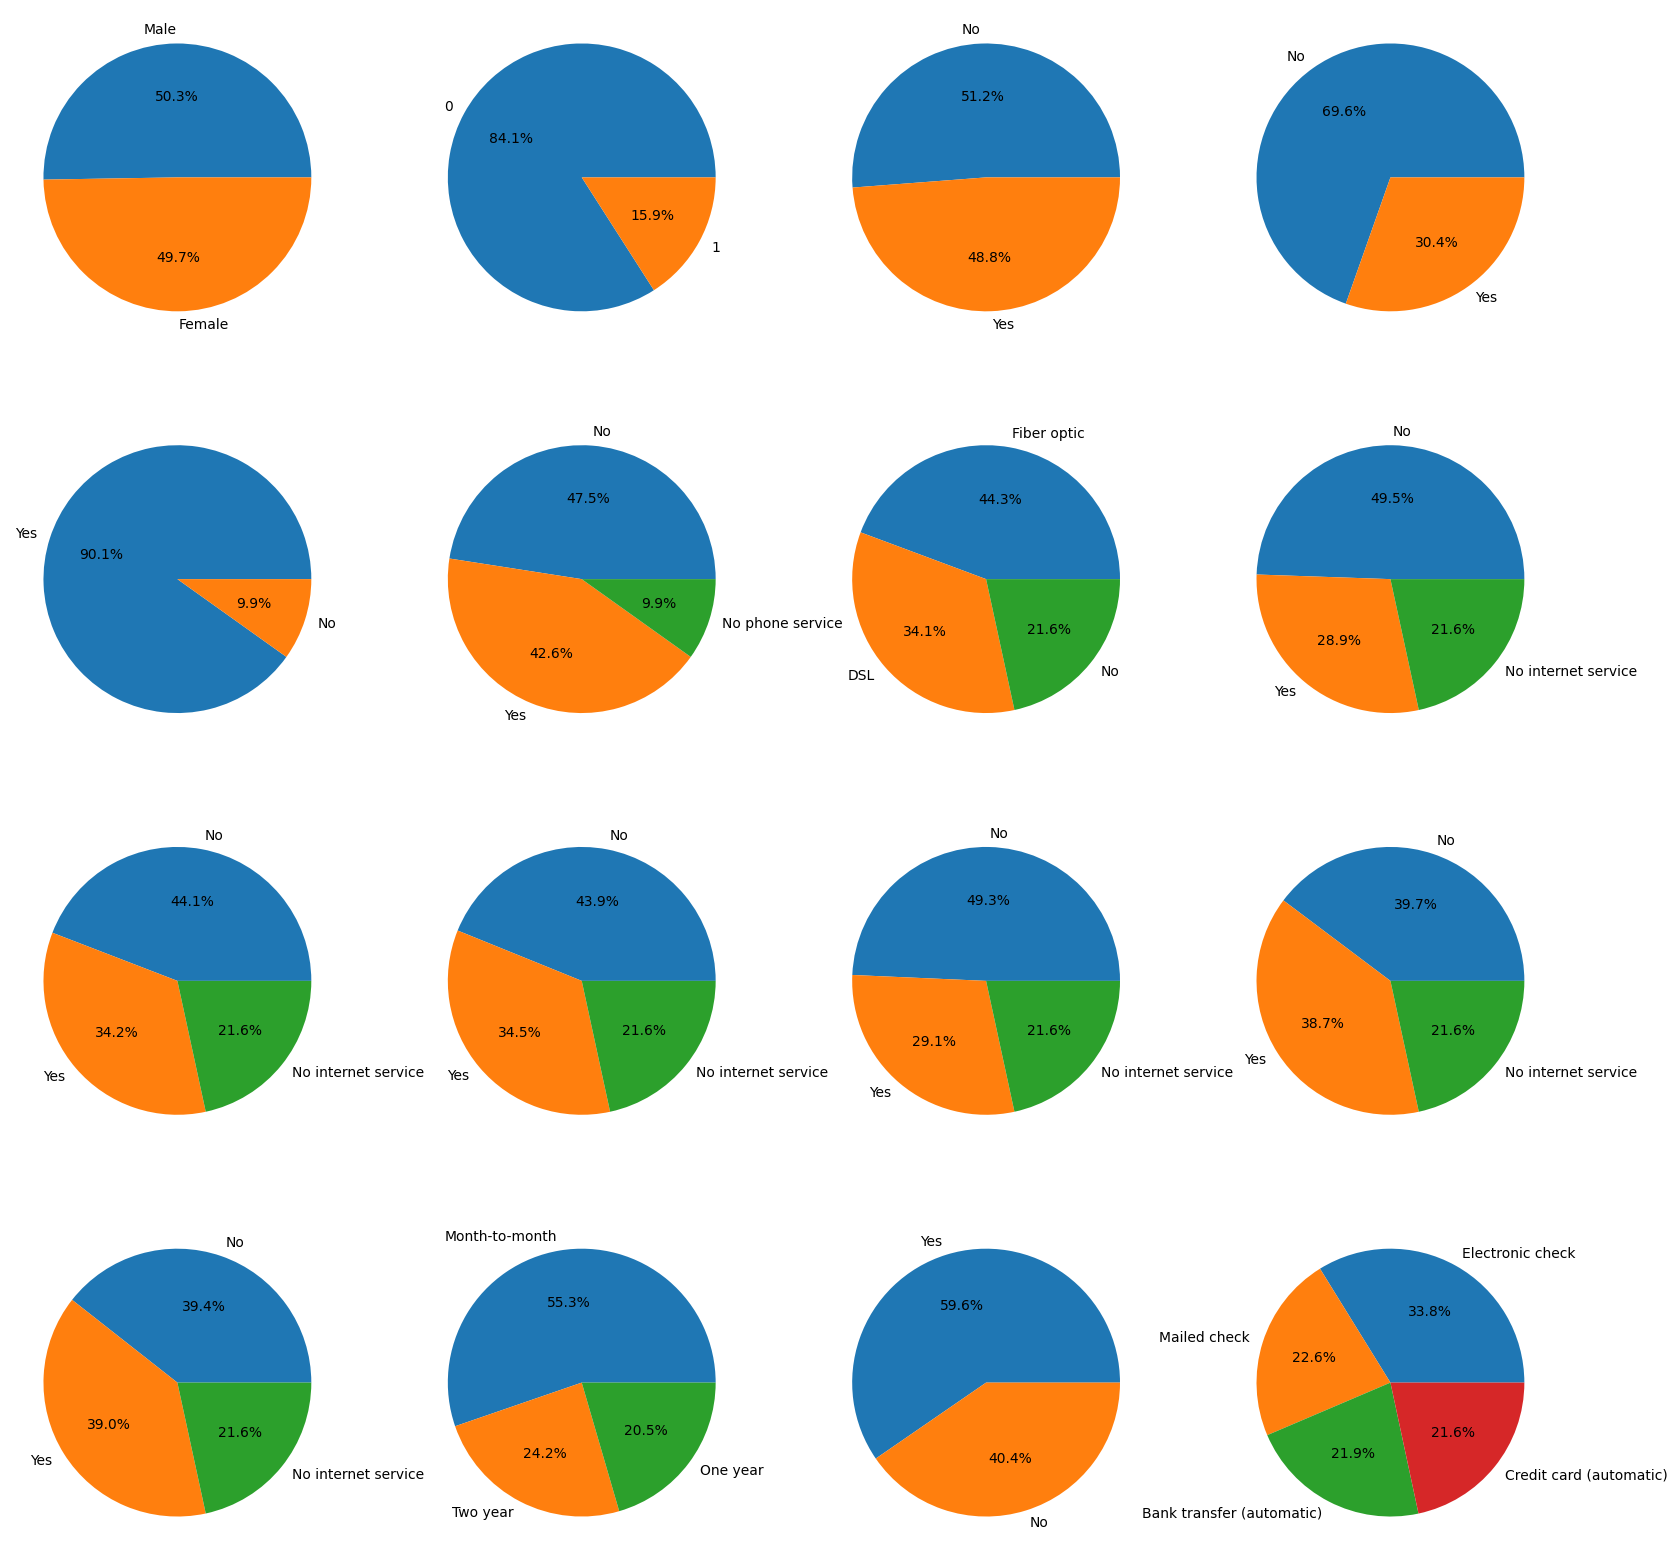

In [17]:
fig, axs = plt.subplots(4, 4, figsize = (20,20))
for i in range(len(cat_cols)):
    value_counts = data[cat_cols[i]].value_counts()
    axs[i//4, i%4].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

plt.show()


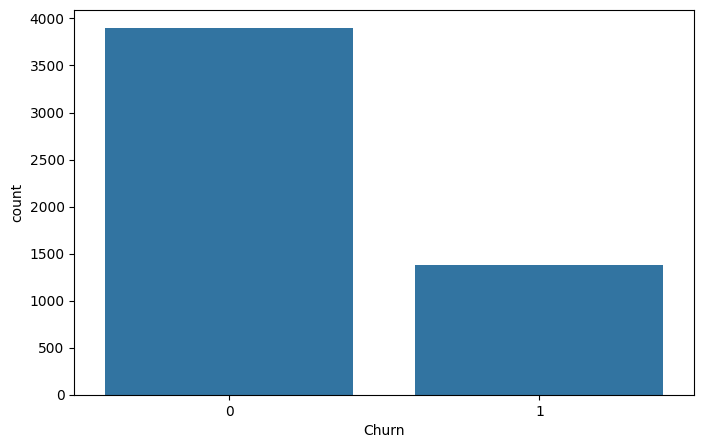


Датасет сбалансирован по классам


In [18]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x = data[target_col])
plt.show()
class_counts = data[target_col].value_counts()
if class_counts.min() / class_counts.max() < 0.2:
    print("\nДатасет несбалансирован по классам")
else:
    print("\nДатасет сбалансирован по классам")

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [21]:
X_origin = data[num_cols+cat_cols]
X_origin = X_origin.iloc[:, :-1]
X_origin.shape


(5282, 18)

In [22]:
# отнормируем числовые признаки

numeric_data = data[num_cols]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_data = scaler.fit_transform(numeric_data)
num_data = pd.DataFrame(num_data)
num_data.columns = num_cols

#one hot encoding

categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data)

X = pd.concat([numeric_data, dummy_features], axis=1)
#X = X.replace(True,1).replace(False,0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   IsSeniorCitizen                               5282 non-null   int64  
 4   Sex_Female                                    5282 non-null   bool   
 5   Sex_Male                                      5282 non-null   bool   
 6   HasPartner_No                                 5282 non-null   bool   
 7   HasPartner_Yes                                5282 non-null   bool   
 8   HasChild_No                                   5282 non-null   bool   
 9   HasChild_Yes                                  5282 non-null   b

In [23]:
# для тестовых данных сделаем также нормировку и one hot coding
# отнормируем числовые признаки

numeric_data = data_test[num_cols]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_data = scaler.fit_transform(numeric_data)
num_data = pd.DataFrame(num_data)
num_data.columns = num_cols

#one hot encoding

categorial_data = data_test[cat_cols]
dummy_features = pd.get_dummies(categorial_data)

X_test_main = pd.concat([numeric_data, dummy_features], axis=1)
#X = X.replace(True,1).replace(False,0)
X_test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  1761 non-null   int64  
 1   MonthlySpending                               1761 non-null   float64
 2   TotalSpent                                    1761 non-null   float64
 3   IsSeniorCitizen                               1761 non-null   int64  
 4   Sex_Female                                    1761 non-null   bool   
 5   Sex_Male                                      1761 non-null   bool   
 6   HasPartner_No                                 1761 non-null   bool   
 7   HasPartner_Yes                                1761 non-null   bool   
 8   HasChild_No                                   1761 non-null   bool   
 9   HasChild_Yes                                  1761 non-null   b

In [24]:
X.shape

(5282, 45)

In [46]:
#разделяем выборку на train и test

In [25]:

y  = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)
X_train

array([[31, 73.55, 2094.65, ..., True, False, False],
       [59, 100.05, 6034.85, ..., False, False, True],
       [60, 99.0, 6017.9, ..., False, True, False],
       ...,
       [50, 20.55, 1070.25, ..., True, False, False],
       [8, 84.5, 662.65, ..., False, False, False],
       [68, 54.45, 3674.95, ..., True, False, False]], dtype=object)

In [26]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='f1',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()

    return means, error

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
#grids = [[100, 10, 1, 0.1, 0.01, 0.001],[100, 10, 1, 0.1, 0.01, 0.001]]
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]

param_scales = ['log', 'ordinary']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


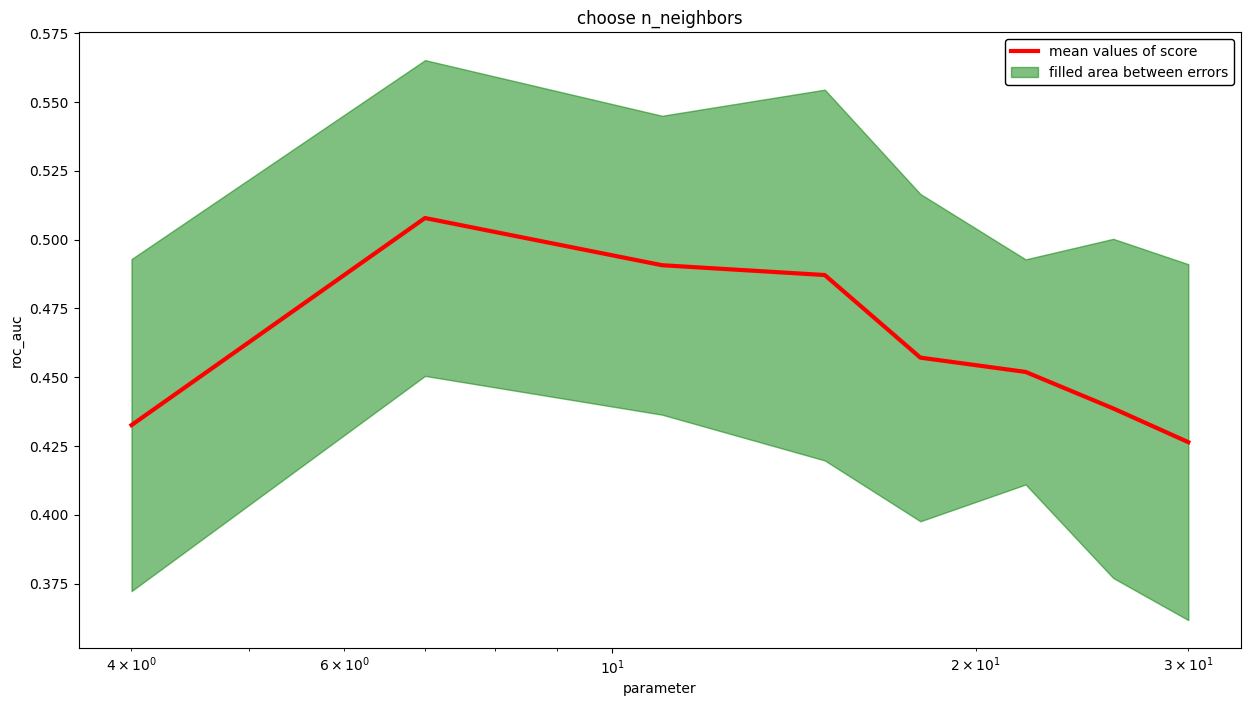

Fitting 5 folds for each of 29 candidates, totalling 145 fits


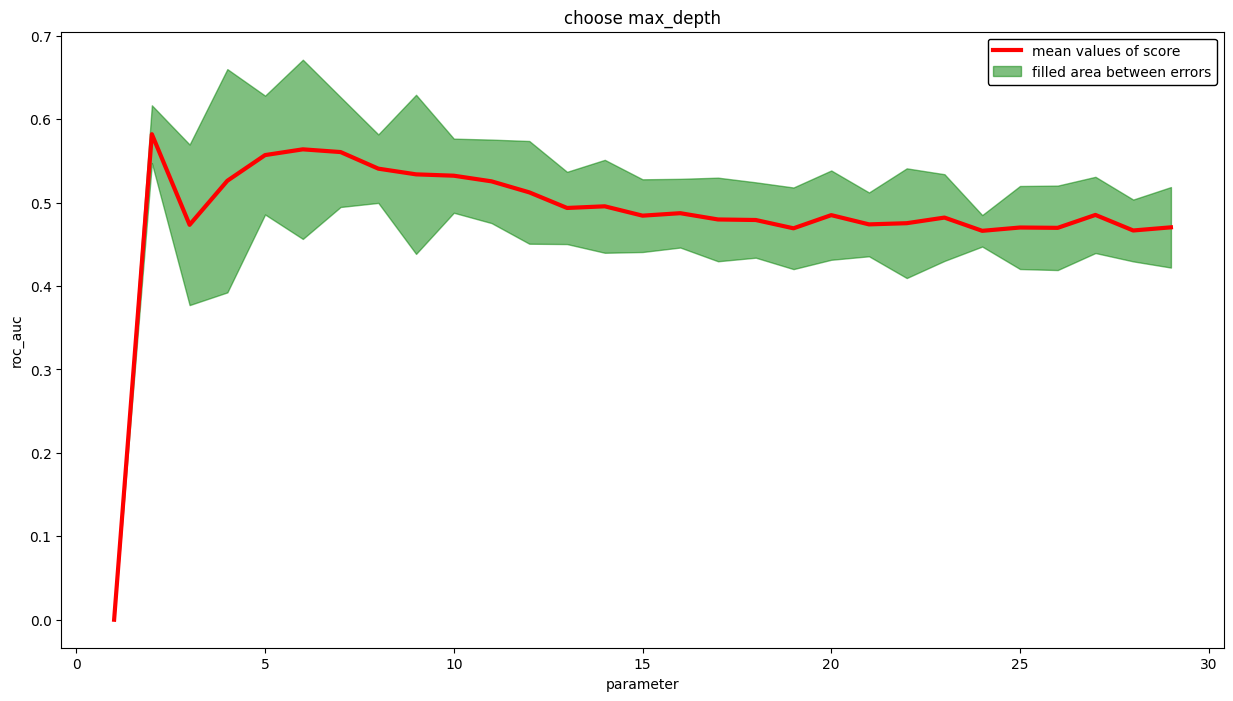

In [28]:
for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

In [45]:
# качество этих моделей очень низкое

In [29]:
# теперь случайный лес

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [30]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []

    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]

    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]

    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_

    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

    scores = np.array(scores)

    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

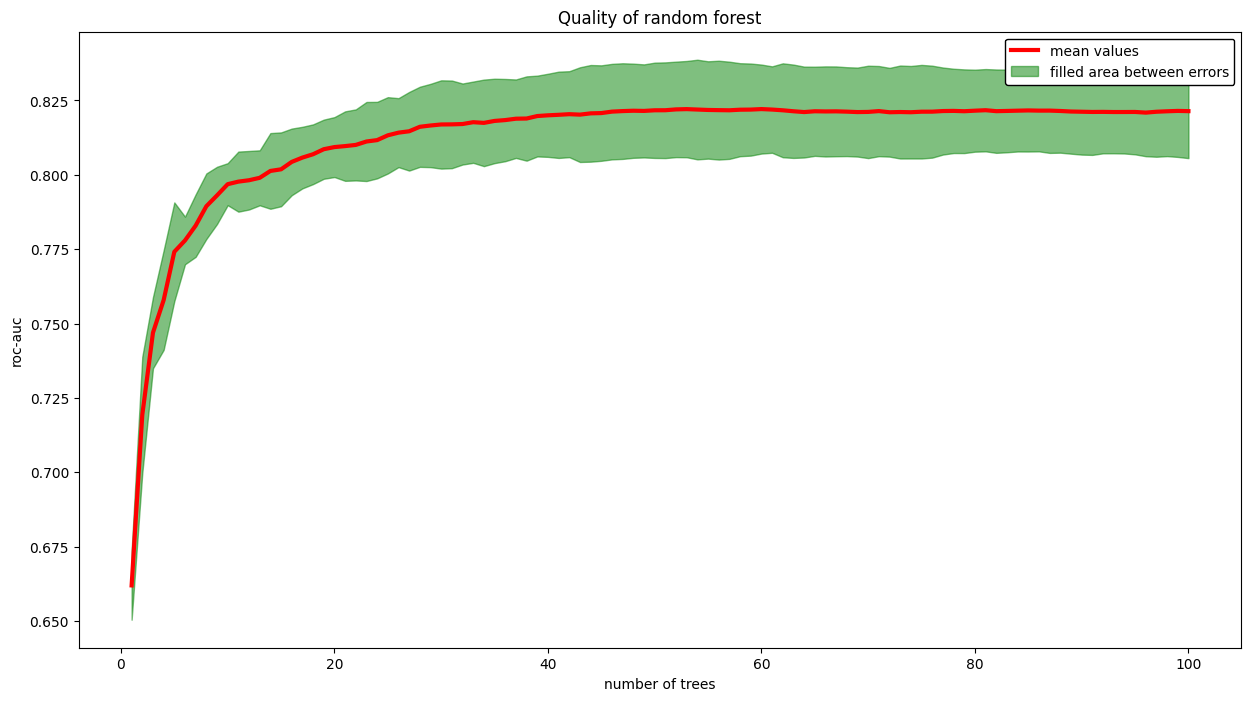

In [31]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values,
                 mean_cross_val_score - 2 * std_cross_val_score,
                 mean_cross_val_score + 2 * std_cross_val_score,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [32]:
#вывод стал лучше

model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

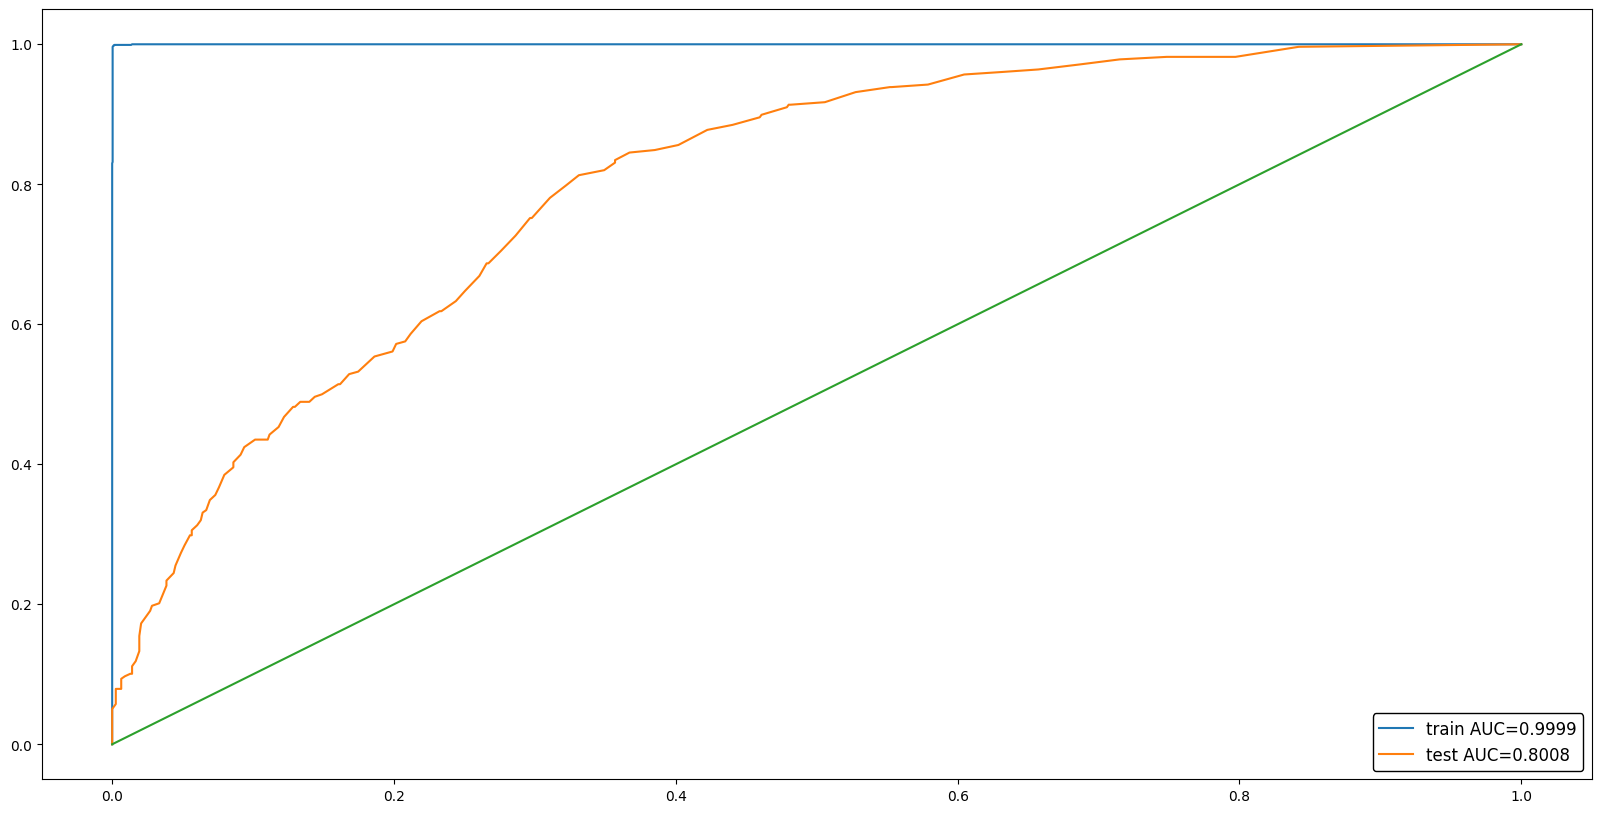

In [34]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

LR_model = LogisticRegressionCV(cv=5, random_state=42,n_jobs=-1)
LR_model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_prob = LR_model.predict_proba(X_test)[:, 1]

# Step 5: Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.4f}')
# ошибка на ограничение использвание ядер процессора (ошибка на решение никак не влияет, простое инфромирование.. пыталась убрать эту проблему через n_jobs=-1 и до конца всё равно не ушла)

ROC AUC Score: 0.8280


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Выпишите какое лучшее качество и с какими параметрами вам удалось получить
Лучшее качество у линейной регрессии и случайного леса (две модели чуть выше)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [36]:
columns = np.array(data.columns)
columns
n = 0
columns_list = []
for i in range(len(columns)):
    if columns[i] in cat_cols:
        columns_list.append(i)
    i+=1
columns_list
X_origin = data.iloc[:, :-1]

In [37]:
import catboost


# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values,
                                                       train_size=0.8,
                                                       random_state=42)

boosting_model1 = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=columns_list)

boosting_model1.fit(X_train_origin, y_train)

#y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
#y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]



Learning rate set to 0.083391
0:	learn: 0.6382805	total: 242ms	remaining: 48.2s
1:	learn: 0.5973367	total: 304ms	remaining: 30.1s
2:	learn: 0.5611936	total: 363ms	remaining: 23.8s
3:	learn: 0.5330845	total: 422ms	remaining: 20.7s
4:	learn: 0.5112684	total: 497ms	remaining: 19.4s
5:	learn: 0.4931565	total: 563ms	remaining: 18.2s
6:	learn: 0.4801427	total: 617ms	remaining: 17s
7:	learn: 0.4682157	total: 687ms	remaining: 16.5s
8:	learn: 0.4583537	total: 762ms	remaining: 16.2s
9:	learn: 0.4495324	total: 841ms	remaining: 16s
10:	learn: 0.4441110	total: 899ms	remaining: 15.4s
11:	learn: 0.4373882	total: 959ms	remaining: 15s
12:	learn: 0.4324777	total: 1.03s	remaining: 14.9s
13:	learn: 0.4272376	total: 1.09s	remaining: 14.5s
14:	learn: 0.4223943	total: 1.15s	remaining: 14.1s
15:	learn: 0.4191343	total: 1.22s	remaining: 14s
16:	learn: 0.4177161	total: 1.27s	remaining: 13.7s
17:	learn: 0.4161855	total: 1.31s	remaining: 13.2s
18:	learn: 0.4125708	total: 1.38s	remaining: 13.2s
19:	learn: 0.410205

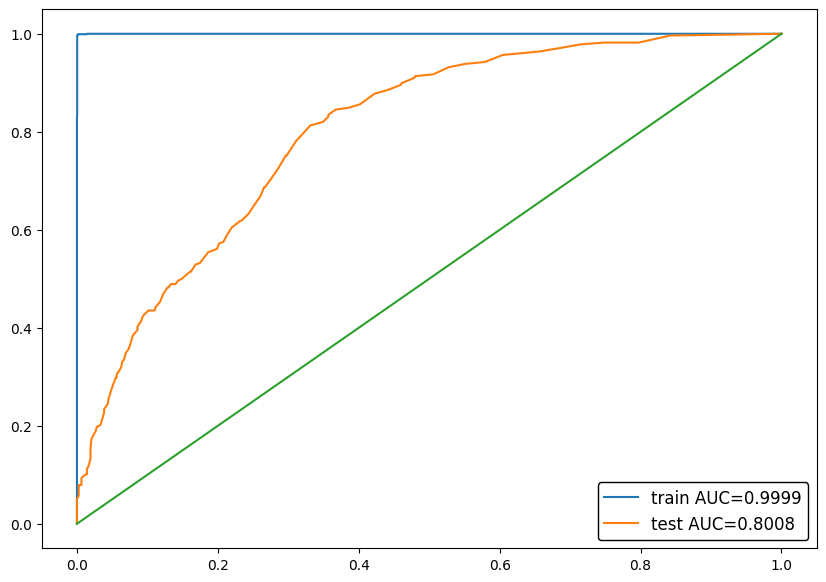

In [38]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [39]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=[i for i in range(3, 19)],
                                             eval_metric='AUC',one_hot_max_size=255)
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)},
                           X_train_origin,
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8368846331
bestIteration = 118

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8368846	best: 0.8368846 (0)	total: 2.34s	remaining: 44.5s

bestTest = 0.8371721877
bestIteration = 146

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8371722	best: 0.8371722 (1)	total: 4.75s	remaining: 42.7s

bestTest = 0.8355151541
bestIteration = 107

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8355152	best: 0.8371722 (1)	total: 7.05s	remaining: 39.9s

bestTest = 0.8381498735
bestIteration = 132

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8381499	best: 0.8381499 (3)	total: 8.66s	remaining: 34.6s

bes

{'params': {'l2_leaf_reg': 0.9473684210526316},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

In [40]:
import xgboost

In [41]:
boosting_model = xgboost.XGBClassifier(n_estimators=500)

boosting_model.fit(X_train, y_train)

y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
y_test_predicted

array([9.8682833e-01, 6.4379081e-02, 4.9273273e-01, ..., 2.6921409e-01,
       8.3285313e-06, 3.4480766e-04], dtype=float32)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ лучший скор 0,8463 из этих моделей

# Предсказания

In [42]:
submission = pd.read_csv('./submission.csv')
submission['Churn']

0       0.5
1       0.5
2       0.5
3       0.5
4       0.5
       ... 
1756    0.5
1757    0.5
1758    0.5
1759    0.5
1760    0.5
Name: Churn, Length: 1761, dtype: float64

In [43]:
y_test_predicted = LR_model.predict_proba(X_test_main.values)[:, 1]
y_test_predicted

array([0.04802465, 0.7013575 , 0.70684403, ..., 0.77577162, 0.65607694,
       0.01231866])

In [44]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('submission.csv')

submission['Churn'] = y_test_predicted# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('my_submission7.csv')

Лучшее решение отправьте в Stepik.

Лучшее решение на Stepic 0.8461938079694922